In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from random import randint
import math

In [ ]:
df = pd.read_csv("/content/FoDS-A1.csv")
df.head(10)

Strength  Temperature  Pressure
0      30.7          240        16
1      24.7          250        18
2      30.6          260        16
3      32.8          240        10
4      20.7          240        20
5      34.5          260        16
6      41.9          290        12
7      36.4          280        12
8      22.2          200        12
9      20.7          210        14

In [ ]:
df.shape

(1650, 3)

In [ ]:
X = df.drop(["Pressure"], axis=1)
Y = df["Pressure"]

In [ ]:
X

Strength  Temperature
0         30.7          240
1         24.7          250
2         30.6          260
3         32.8          240
4         20.7          240
...        ...          ...
1645      32.5          270
1646      38.6          290
1647      39.7          290
1648      14.6          200
1649      19.8          210

[1650 rows x 2 columns]

In [ ]:
Y

0       16
1       18
2       16
3       10
4       20
        ..
1645    20
1646    14
1647    12
1648    20
1649    20
Name: Pressure, Length: 1650, dtype: int64

In [ ]:
X.to_numpy
Y.to_numpy

<bound method IndexOpsMixin.to_numpy of 0       16
1       18
2       16
3       10
4       20
        ..
1645    20
1646    14
1647    12
1648    20
1649    20
Name: Pressure, Length: 1650, dtype: int64>

In [ ]:
train_size = 0.7
train_end = int(len(df)*train_size)

X_train = X[:train_end]
X_test = X[train_end:]

Y_train = Y[:train_end]
Y_test = Y[train_end:]

In [ ]:
X_train

Strength  Temperature
0         30.7          240
1         24.7          250
2         30.6          260
3         32.8          240
4         20.7          240
...        ...          ...
1150      26.2          220
1151      30.2          230
1152      25.2          240
1153      29.5          270
1154      19.5          220

[1155 rows x 2 columns]

In [ ]:
Y_train

0       16
1       18
2       16
3       10
4       20
        ..
1150    14
1151    10
1152    16
1153    20
1154    18
Name: Pressure, Length: 1155, dtype: int64

In [ ]:
m, n = X_train.shape
print(m ,n)

1155 2


#Plotting function


In [ ]:
def plot_surface(X,w):

  Z = X @ w.T

  fig = plt.figure(figsize =(14, 9))
  ax = plt.axes(projection ='3d')
  ax.plot_trisurf(X[:,1], X[:,2], Z)
  plt.show()

#Gradient descent Algorithms


In [ ]:
def BGD(X,Y,epoch,alpha):

  m,n = X.shape
  w = np.random.random(n)

  for iter in range(epoch):
    Y_pred = X @ w.T
    J = (1/(2*m))*np.sum((np.square(Y_pred - Y)))
    w = w - alpha * (1/m) * (X.T @ (Y_pred - Y))

    if iter%50==0:
      print(iter, J)

  return(w)

In [ ]:
def SGD(X,Y,epoch,alpha):

  m,n = X.shape
  w = np.random.random(n)

  for iter in range(epoch):
    ind = randint(0,m-1)

    Y_pred_ind = X[ind] @ w.T
  
    w = w - alpha * (1/m) * X[ind]* (Y_pred_ind - Y[ind])

    if iter%50==0:
      Y_pred = X @ w.T
      J = (1/(2*m))*np.sum((np.square(Y_pred - Y)))
      print(iter,J)

  return(w)

#X matrices

In [ ]:
i,j = X_test.shape

X_test = np.hstack((np.ones((i, 1)), X_test))

X_test[:, 1:] = (X_test[:, 1:] - np.mean(X_test[:, 1:], axis=0)) / np.std(X_test[:, 1:], axis=0)

In [ ]:
X_train = np.hstack((np.ones((m, 1)), X_train))
X_train.shape

X_train[:, 1:] = (X_train[:, 1:] - np.mean(X_train[:, 1:], axis=0)) / np.std(X_train[:, 1:], axis=0)

In [ ]:
X_train.shape

(1155, 3)

#0th degree 

In [ ]:
m,n = X_train.shape
w = 0

for iter in range(2000):
  Y_pred = np.hstack((np.ones((m, 1)))) * w
  J = (1/(2*m))*np.sum((np.square(Y_pred - Y_train)))
  w = w - 0.01 * (1/m) * (np.ones((1,m)) @ (Y_pred - Y_train))

  if iter%50==0:
    print(iter, J)

print("W is ", w)

test_Error = (1/(2*m))*np.sum((np.square(np.hstack((np.ones((i, 1)))) * w - Y_test)))
print("Test error is ", test_Error)

0 117.24502164502165
50 46.57261143664368
100 20.704223664648975
150 11.235557123501973
200 7.76971894071046
250 6.501110076189117
300 6.036758203348402
350 5.866790400157903
400 5.80457668721502
450 5.781804456207235
500 5.773469083175439
550 5.770418067069226
600 5.769301296500606
650 5.768892522354709
700 5.768742897797035
750 5.768688130369877
800 5.76866808372029
850 5.768660745998206
900 5.768658060154612
950 5.768657077048994
1000 5.768656717200542
1050 5.768656585484369
1100 5.768656537271992
1150 5.7686565196247015
1200 5.768656513165224
1250 5.768656510800846
1300 5.768656509935407
1350 5.768656509618628
1400 5.7686565095026765
1450 5.768656509460235
1500 5.7686565094447
1550 5.768656509439014
1600 5.7686565094369335
1650 5.76865650943617
1700 5.768656509435891
1750 5.76865650943579
1800 5.768656509435752
1850 5.768656509435738
1900 5.768656509435734
1950 5.768656509435732
W is  [14.9316017]
Test error is  2.568018485988157


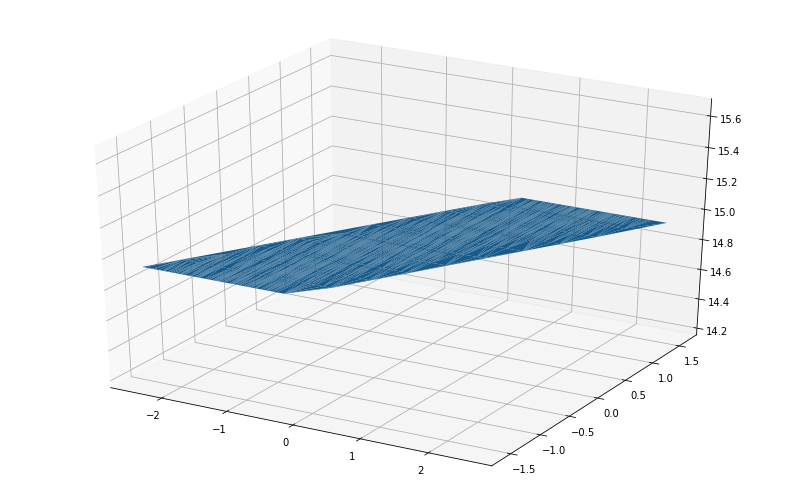

In [ ]:
Y_pred = np.hstack((np.ones((m, 1)))) * w

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.plot_trisurf(X_train[:,1], X_train[:,2], Y_pred )
plt.show()

In [ ]:
w=0

for iter in range(5000):
  ind = randint(0,m-1)

  Y_pred_ind = w

  w = w - 1 * (1/m) * (Y_pred_ind - Y_train[ind])

  if iter%50==0:
    Y_pred = np.hstack((np.ones((m, 1)))) * w
    J = (1/(2*m))*np.sum((np.square(Y_pred - Y_train)))
    print(iter,J)

print("W is ", w)

test_Error = (1/(2*m))*np.sum((np.square(np.hstack((np.ones((i, 1)))) * w - Y_test)))
print("Test error is ", test_Error)

0 117.06410599501511
50 107.85901932339884
100 99.18875807563893
150 91.37722159905192
200 84.40970650863424
250 78.31947369796282
300 72.20543874311981
350 66.62500783038908
400 61.707463574891904
450 56.677628580318256
500 52.442733022125935
550 48.74673076814458
600 45.33581059706946
650 42.19961201086319
700 38.66009482644857
750 35.920731139298546
800 33.28119809386686
850 30.90320387793337
900 28.54507125285526
950 26.934406086181475
1000 25.202314240323282
1050 23.694731226979922
1100 22.122307677531552
1150 20.962132457974615
1200 19.783706851082073
1250 18.614005412795322
1300 17.61930141402259
1350 16.63776094469122
1400 15.80139521983642
1450 15.09584078684393
1500 14.281380642824148
1550 13.746009799860845
1600 13.144322991450023
1650 12.47301427889021
1700 11.837140769447153
1750 11.289522666060893
1800 10.741765436915562
1850 10.325591400631478
1900 10.017210993599441
1950 9.515140734553883
2000 9.259105750058751
2050 8.923739080790808
2100 8.651552379201178
2150 8.336712

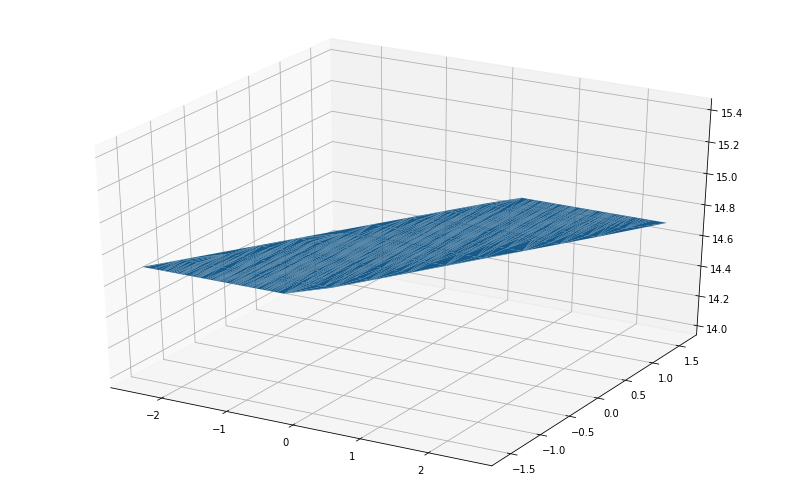

In [ ]:
Y_pred = np.hstack((np.ones((m, 1)))) * w

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.plot_trisurf(X_train[:,1], X_train[:,2], Y_pred )
plt.show()

#1st degree

In [ ]:
X_train.shape

(1155, 3)

In [ ]:
w = BGD(X_train, Y_train, 1000, 0.1)
print("W is ", w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 118.00144872629967
50 2.096797232322745
100 1.3859340278988517
150 1.224322230466663
200 1.1874282815585246
250 1.1790058511195776
300 1.177083114828065
350 1.176644178006503
400 1.1765439741802302
450 1.1765210988908799
500 1.1765158767463537
550 1.1765146845955996
600 1.1765144124423847
650 1.1765143503131852
700 1.17651433612986
750 1.1765143328919834
800 1.1765143321528162
850 1.1765143319840734
900 1.1765143319455518
950 1.1765143319367577
W is  [14.93160173 -5.80916514  5.07317277]
Test error is  2.461002459914413


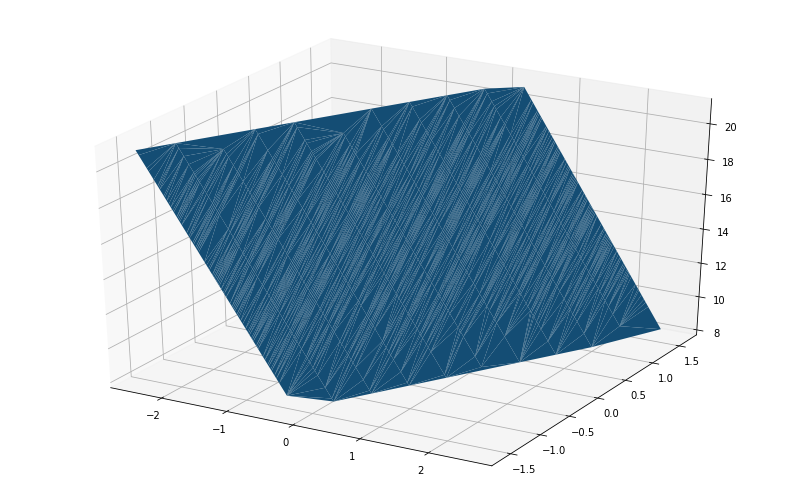

In [ ]:
plot_surface(X_train,w)

In [ ]:
w = SGD(X_train, Y_train, 5000, 5)
print("W is ", w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 105.37010984008698
50 68.69443914985024
100 46.229698519968935
150 31.127004648004007
200 21.10010621636529
250 15.335834678826922
300 11.237838682946235
350 8.47482645848288
400 6.624498258496294
450 5.712972267709568
500 4.611576899021413
550 4.043723444255498
600 3.674251999820333
650 3.383465542680331
700 3.201679685816162
750 3.0894295428295404
800 2.910344878586472
850 2.742290188820105
900 2.596317007450231
950 2.5026414272772213
1000 2.4486216306076747
1050 2.3791682905377165
1100 2.3045773007884813
1150 2.2347357923268243
1200 2.182667754577824
1250 2.1159485574573518
1300 2.0659623211263796
1350 1.9999114081715708
1400 1.9494755323069721
1450 1.8962465433858022
1500 1.8644987043222507
1550 1.829876263868267
1600 1.7822061496145047
1650 1.7448888769537954
1700 1.7016607423033903
1750 1.667953992029179
1800 1.636208977660024
1850 1.6103912591849574
1900 1.5818848229006979
1950 1.5590481398515528
2000 1.5299891612009695
2050 1.5097778755218163
2100 1.4854274890126768
2150 1.45

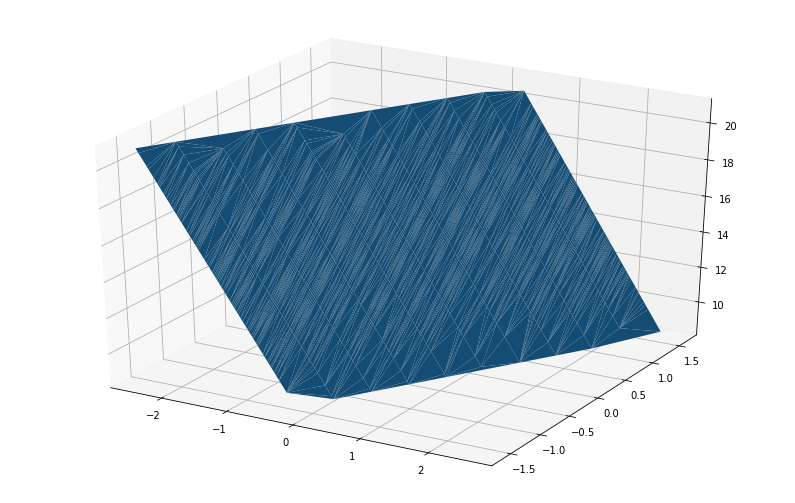

In [ ]:
plot_surface(X_train,w)

#2nd degree

In [ ]:
X_test = np.hstack((
    X_test,
    (X_test[:, 1] ** 2).reshape((i, 1)),
    (X_test[:, 2] ** 2).reshape((i, 1)),
    (np.multiply(X_test[:,1],X_test[:,2])).reshape((i,1))
))

X_test[:, 1:] = (X_test[:, 1:] - np.mean(X_test[:, 1:], axis=0)) / np.std(X_test[:, 1:], axis=0)

In [ ]:
X_train = np.hstack((
    X_train,
    (X_train[:, 1] ** 2).reshape((m, 1)),
    (X_train[:, 2] ** 2).reshape((m, 1)),
    (np.multiply(X_train[:,1],X_train[:,2])).reshape((m,1))
))

X_train[:, 1:] = (X_train[:, 1:] - np.mean(X_train[:, 1:], axis=0)) / np.std(X_train[:, 1:], axis=0)

X_train.shape

(1155, 6)

In [ ]:
w = BGD(X_train, Y_train, 1000, 0.01)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 115.27257541017181
50 44.95422307740011
100 19.23701987894713
150 9.583335333102514
200 5.809602448560129
250 4.216413542935007
300 3.449637665962257
350 3.0103132781432294
400 2.7124785926192123
450 2.485124272564832
500 2.299708683348016
550 2.1435815488835988
600 2.0102100521559034
650 1.8955603432760866
700 1.7967375666382706
750 1.711457418068432
800 1.6378262627486828
850 1.57423781613997
900 1.5193156135406616
950 1.4718749341919455
W is [14.93096877 -4.4796085   3.74381713  0.15886173 -0.02687519 -0.0840065 ]
Test error is  3.0583981516117453


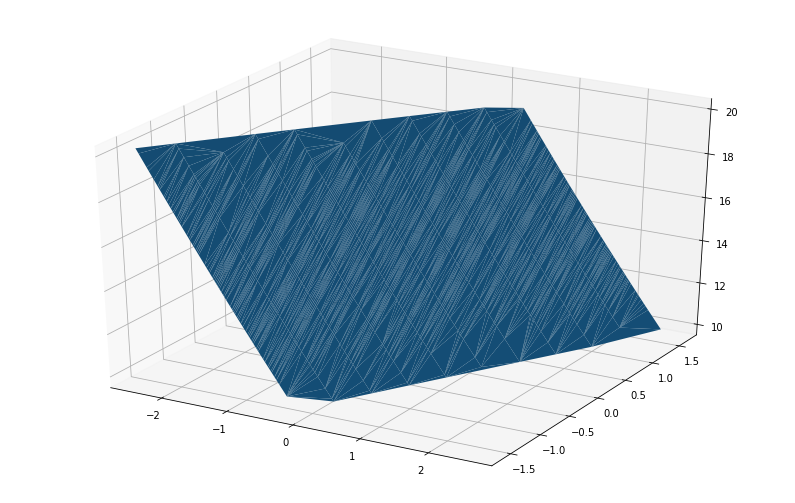

In [ ]:
plot_surface(X_train,w)

In [ ]:
w = SGD(X_train, Y_train, 5000, 5)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 116.75935842681851
50 79.2986624231495
100 52.657924424926186
150 35.50461125844422
200 24.441634661922645
250 16.507404143562802
300 12.087129531922312
350 9.182347665592197
400 6.799672290663663
450 5.747330326340547
500 5.007873321006057
550 4.088486835322952
600 3.6883729801578604
650 3.387332847360755
700 3.1451741047955677
750 2.9755456483260967
800 2.840693416691826
850 2.760687520186208
900 2.6607782026058904
950 2.5428197605152745
1000 2.390624235406176
1050 2.356702195016304
1100 2.2628144716292855
1150 2.2151046089387054
1200 2.112190739242968
1250 2.035977052498927
1300 1.9983988838985878
1350 1.9582999616761054
1400 1.9306382780198523
1450 1.8791829944962728
1500 1.8469637251815674
1550 1.7999712863950736
1600 1.730731008999905
1650 1.677943253382166
1700 1.6508277478651918
1750 1.6167449030685426
1800 1.5875403935672012
1850 1.562331299456611
1900 1.5491360243934045
1950 1.5199477206203083
2000 1.516700221226121
2050 1.4875375109942763
2100 1.4640544446434582
2150 1.456

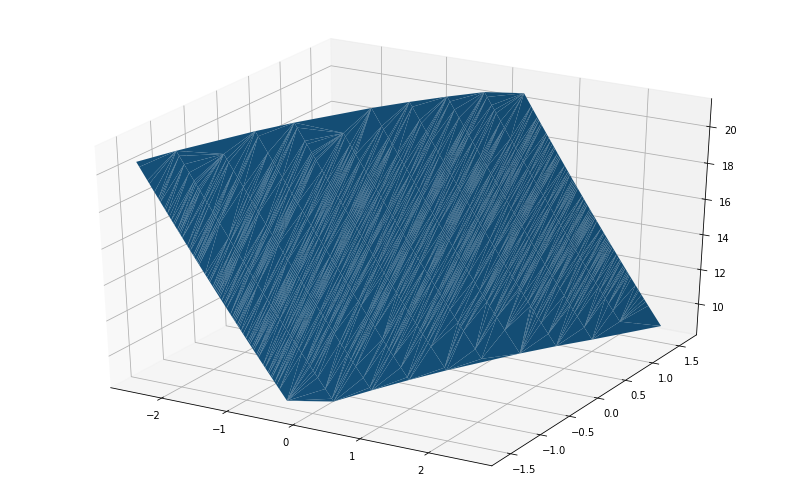

In [ ]:
plot_surface(X_train,w)

#3rd degree

In [ ]:
X_test = np.hstack((
    X_test,
    (X_test[:, 1] ** 3).reshape((i, 1)),
    (X_test[:, 2] ** 3).reshape((i, 1)),
    (np.multiply((X_test[:,1]**2),X_test[:,2])).reshape((i,1)),
    (np.multiply(X_test[:,1],(X_test[:,2]**2))).reshape((i,1))
))

X_test[:, 1:] = (X_test[:, 1:] - np.mean(X_test[:, 1:], axis=0)) / np.std(X_test[:, 1:], axis=0)

In [ ]:
X_test.shape

(495, 10)

In [ ]:
X_train = np.hstack((
    X_train,
    (X_train[:, 1] ** 3).reshape((m, 1)),
    (X_train[:, 2] ** 3).reshape((m, 1)),
    (np.multiply((X_train[:,1]**2),X_train[:,2])).reshape((m,1)),
    (np.multiply(X_train[:,1],(X_train[:,2]**2))).reshape((m,1))
))

X_train[:, 1:] = (X_train[:, 1:] - np.mean(X_train[:, 1:], axis=0)) / np.std(X_train[:, 1:], axis=0)

X_train.shape

(1155, 10)

In [ ]:
w = BGD(X_train, Y_train, 1000, 0.01)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 112.7338426721117
50 42.22911387073831
100 17.37727595952856
150 8.075096426497097
200 4.519570938827859
250 3.1093972544310557
300 2.5119732164439252
350 2.230282848134891
400 2.0765609455091165
450 1.9783526782474337
500 1.9067246301358904
550 1.8494955460529154
600 1.8011348596765695
650 1.7588778044250823
700 1.7211868165749622
750 1.6871152548921906
800 1.6560282152467558
850 1.6274706709982156
900 1.6010999035300761
950 1.5766479833257034
W is [14.93097997 -3.53077452  2.46039993  0.03894277 -0.1025672   0.07682484
 -0.60313571  1.8040476  -0.80601746 -0.10278727]
Test error is  3.393364080585014


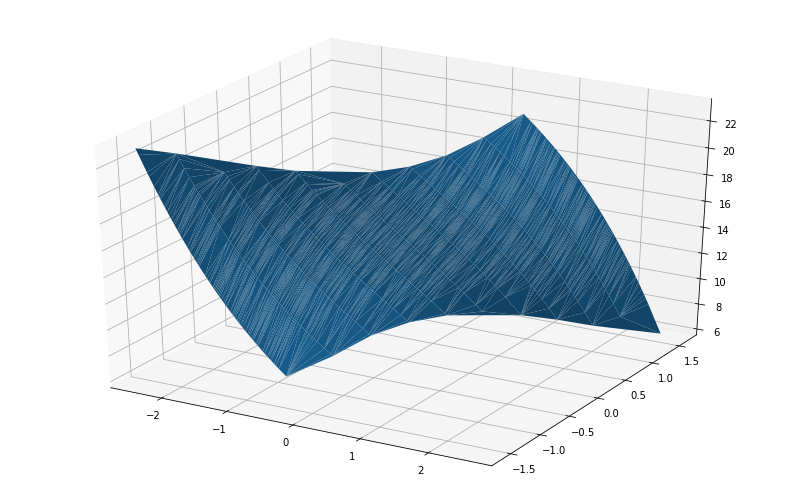

In [ ]:
plot_surface(X_train,w)

In [ ]:
w = SGD(X_train, Y_train, 5000, 1)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 122.48938550645701
50 108.25204943175575
100 98.79321566628381
150 90.41207824274542
200 82.250298815171
250 75.29540704241417
300 69.9656279820141
350 63.718279937579304
400 58.69375612353974
450 54.297581988727416
500 49.99794850664447
550 45.89623478468899
600 42.44902430457543
650 39.000599628506976
700 35.99618646717274
750 33.34199044321004
800 30.823617284929227
850 28.310404831463764
900 26.22802409195546
950 24.273456666258635
1000 22.55700137543887
1050 21.02478611207764
1100 19.412535254822266
1150 18.028407844001862
1200 16.888295492161774
1250 15.691916233104251
1300 14.520784119794445
1350 13.609165287442545
1400 12.6796508994786
1450 11.784120257558426
1500 11.138521475383506
1550 10.471359162165754
1600 9.914616738162346
1650 9.326367703550762
1700 8.718487564539597
1750 8.209337564401
1800 7.727762710684382
1850 7.32022554725203
1900 6.873874682541315
1950 6.551760689465275
2000 6.301879066496269
2050 6.021997521846381
2100 5.721459884075988
2150 5.448445765360449
22

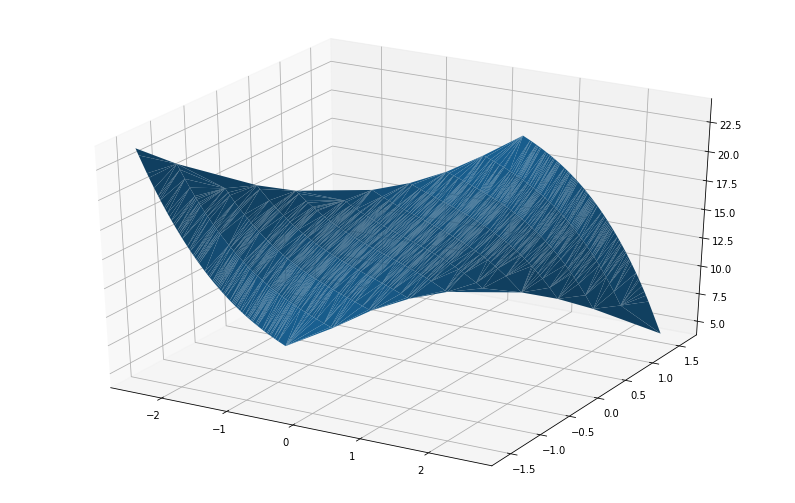

In [ ]:
plot_surface(X_train,w)

#4th degree

In [ ]:
X_test = np.hstack((
    X_test,
    (X_test[:, 1] ** 4).reshape((i, 1)),
    (X_test[:, 2] ** 4).reshape((i, 1)),
    (np.multiply((X_test[:,1]**3),X_test[:,2])).reshape((i,1)),
    (np.multiply(X_test[:,1],(X_test[:,2]**3))).reshape((i,1)),
    (np.multiply((X_test[:,1]**2),(X_test[:,2]**2))).reshape((i,1)),
))

X_test[:, 1:] = (X_test[:, 1:] - np.mean(X_test[:, 1:], axis=0)) / np.std(X_test[:, 1:], axis=0)

In [ ]:
X_train = np.hstack((
    X_train,
    (X_train[:, 1] ** 4).reshape((m, 1)),
    (X_train[:, 2] ** 4).reshape((m, 1)),
    (np.multiply((X_train[:,1]**3),X_train[:,2])).reshape((m,1)),
    (np.multiply(X_train[:,1],(X_train[:,2]**3))).reshape((m,1)),
    (np.multiply((X_train[:,1]**2),(X_train[:,2]**2))).reshape((m,1)),
))

X_train[:, 1:] = (X_train[:, 1:] - np.mean(X_train[:, 1:], axis=0)) / np.std(X_train[:, 1:], axis=0)

X_train.shape

(1155, 15)

In [ ]:
w = BGD(X_train, Y_train, 1000, 0.01)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 117.11755128596623
50 39.764265530679495
100 16.48968864616328
150 7.773883126197994
200 4.434081934182054
250 3.100463617276761
300 2.526941608308246
350 2.2493489917840037
400 2.0925850071505736
450 1.9891431698377628
500 1.9120271851354929
550 1.8497882885566996
600 1.797134524022247
650 1.751334482019321
700 1.710800317612895
750 1.6745045826300886
800 1.6417247893150253
850 1.611922102939538
900 1.584678137165569
950 1.5596588194298844
W is [14.93099961 -3.52707148  2.62803101  0.10062328 -0.06329264 -0.13391281
 -0.97989845  1.54843013 -0.30125147 -0.16678749 -0.07501763  0.16862991
  0.26004068 -0.23402417  0.02685389]
Test error is  3.3376827734271313


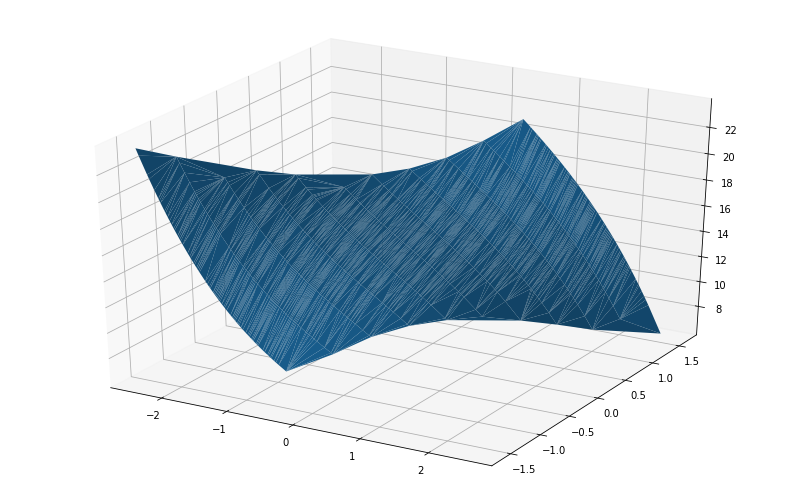

In [ ]:
plot_surface(X_train,w)

In [ ]:
w = SGD(X_train, Y_train, 5000, 1)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 114.6513703381301
50 99.45560245032276
100 89.36052951249751
150 81.35827092103928
200 74.6170032334892
250 69.00177819999772
300 62.54805341947693
350 57.51721438329845
400 53.289922104209815
450 49.48480971717281
500 45.935302164419774
550 42.01149236323399
600 38.35272837303477
650 35.39149507029067
700 32.684448446536244
750 30.258821491569304
800 28.421480747402498
850 26.432400216102828
900 24.47277907236041
950 22.661797309740184
1000 20.990477755750224
1050 19.47732741033217
1100 18.161902245537423
1150 17.118631561126172
1200 15.764827926498937
1250 14.792767917128112
1300 13.88465527757168
1350 12.892132443404316
1400 12.030291890801688
1450 11.277128231720607
1500 10.58231505830004
1550 9.941609189855953
1600 9.275332473841972
1650 8.741498797324137
1700 8.167908417618515
1750 7.780821924676448
1800 7.346495809299462
1850 6.893955012232107
1900 6.597367915299249
1950 6.299484249111826
2000 6.045101137707982
2050 5.779004593170975
2100 5.522096252852462
2150 5.3275023829410

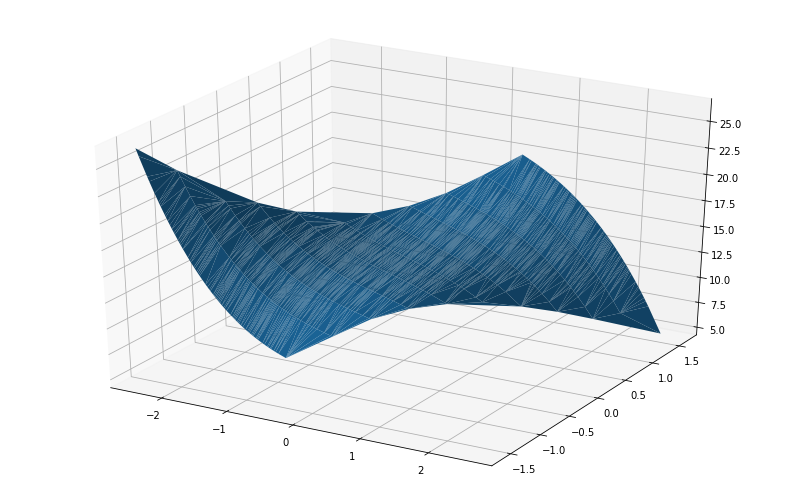

In [ ]:
plot_surface(X_train,w)

#5th degree

In [ ]:
X_test = np.hstack((
    X_test,
    (X_test[:, 1] ** 5).reshape((i, 1)),
    (X_test[:, 2] ** 5).reshape((i, 1)),
    (np.multiply((X_test[:,1]**4),X_test[:,2])).reshape((i,1)),
    (np.multiply(X_test[:,1],(X_test[:,2]**4))).reshape((i,1)),
    (np.multiply((X_test[:,1]**3),(X_test[:,2]**2))).reshape((i,1)),
    (np.multiply((X_test[:,1]**2),(X_test[:,2]**3))).reshape((i,1))
))

X_test[:, 1:] = (X_test[:, 1:] - np.mean(X_test[:, 1:], axis=0)) / np.std(X_test[:, 1:], axis=0)

In [ ]:
X_train = np.hstack((
    X_train,
    (X_train[:, 1] ** 5).reshape((m, 1)),
    (X_train[:, 2] ** 5).reshape((m, 1)),
    (np.multiply((X_train[:,1]**4),X_train[:,2])).reshape((m,1)),
    (np.multiply(X_train[:,1],(X_train[:,2]**4))).reshape((m,1)),
    (np.multiply((X_train[:,1]**3),(X_train[:,2]**2))).reshape((m,1)),
    (np.multiply((X_train[:,1]**2),(X_train[:,2]**3))).reshape((m,1))
))

X_train[:, 1:] = (X_train[:, 1:] - np.mean(X_train[:, 1:], axis=0)) / np.std(X_train[:, 1:], axis=0)

X_train.shape

(1155, 21)

In [ ]:
w = BGD(X_train, Y_train, 1000, 0.01)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 136.45001983658696
50 41.48520778778504
100 17.127765167634703
150 8.070255726615123
200 4.627795415341833
250 3.2592941239680617
300 2.6661373392654646
350 2.3700100979671963
400 2.1933250547706753
450 2.0691346769440035
500 1.9714481848131091
550 1.8896065208989057
600 1.818808845186835
650 1.7565774424935843
700 1.7014166936786168
750 1.6522895339431214
800 1.6084029608205148
850 1.5691133072207548
900 1.5338798491921268
950 1.5022391710270029
W is [14.93098574 -3.62765891  2.79944889  0.06992035  0.14908029  0.02352009
 -0.73802597  1.14802812 -0.46190413 -0.66186093  0.02121097 -0.17326253
 -0.10226339 -0.18197296  0.21730851  0.26259327  0.4425326  -0.0187041
  0.14126013  0.22343315 -0.1876038 ]
Test error is  3.1758707951494487


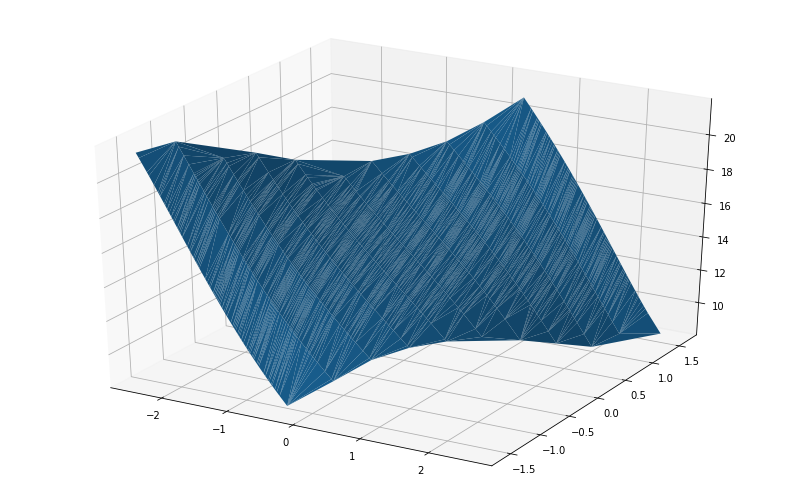

In [ ]:
plot_surface(X_train,w)

In [ ]:
w = SGD(X_train, Y_train, 5000, 1)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 134.60880134272603
50 110.1345132491578
100 94.9509415421515
150 81.47485843244375
200 73.59528304712572
250 68.44886273553776
300 62.38740960788564
350 57.1179386115627
400 52.3516049144619
450 48.5801335000249
500 44.37120009316169
550 40.883929824481015
600 38.12396765611451
650 35.54899702128067
700 32.44645022983151
750 30.272707935172654
800 27.97449216645982
850 25.940495480777678
900 23.954296794451512
950 22.273753685876436
1000 20.57847636124088
1050 19.1159668746267
1100 17.936939597143443
1150 16.616842237270106
1200 15.607180108295328
1250 14.551900705292077
1300 13.562977894272574
1350 12.53851766820655
1400 11.790214668190222
1450 10.97760805366453
1500 10.260293563034724
1550 9.521424182440388
1600 8.910305573231211
1650 8.52447314046948
1700 8.045898976367482
1750 7.667381545577799
1800 7.184453667857481
1850 6.91420606623586
1900 6.560226649981587
1950 6.219365275094774
2000 5.9523248112354326
2050 5.701439036118327
2100 5.526280695589523
2150 5.317709088469777
2200

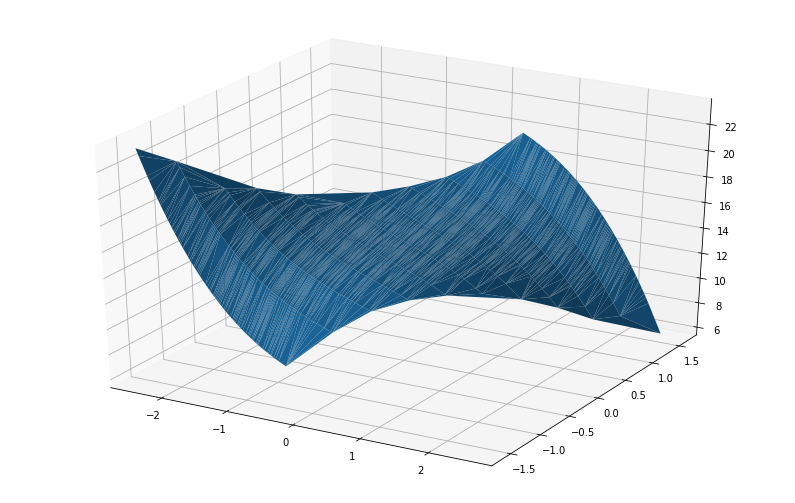

In [ ]:
plot_surface(X_train,w)

#6th degree

In [ ]:
X_test = np.hstack((
    X_test,
    (X_test[:, 1] ** 6).reshape((i, 1)),
    (X_test[:, 2] ** 6).reshape((i, 1)),
    (np.multiply((X_test[:,1]**5),X_test[:,2])).reshape((i,1)),
    (np.multiply(X_test[:,1],(X_test[:,2]**5))).reshape((i,1)),
    (np.multiply((X_test[:,1]**4),(X_test[:,2]**2))).reshape((i,1)),
    (np.multiply((X_test[:,1]**3),(X_test[:,2]**3))).reshape((i,1)),
    (np.multiply((X_test[:,1]**2),(X_test[:,2]**4))).reshape((i,1))
))

X_test[:, 1:] = (X_test[:, 1:] - np.mean(X_test[:, 1:], axis=0)) / np.std(X_test[:, 1:], axis=0)

In [ ]:
X_train = np.hstack((
    X_train,
    (X_train[:, 1] ** 6).reshape((m, 1)),
    (X_train[:, 2] ** 6).reshape((m, 1)),
    (np.multiply((X_train[:,1]**5),X_train[:,2])).reshape((m,1)),
    (np.multiply(X_train[:,1],(X_train[:,2]**5))).reshape((m,1)),
    (np.multiply((X_train[:,1]**4),(X_train[:,2]**2))).reshape((m,1)),
    (np.multiply((X_train[:,1]**3),(X_train[:,2]**3))).reshape((m,1)),
    (np.multiply((X_train[:,1]**2),(X_train[:,2]**4))).reshape((m,1))
))

X_train[:, 1:] = (X_train[:, 1:] - np.mean(X_train[:, 1:], axis=0)) / np.std(X_train[:, 1:], axis=0)

X_train.shape

(1155, 28)

In [ ]:
w = BGD(X_train, Y_train, 1000, 0.01)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 159.9295625349127
50 42.59820560357181
100 17.627015170404615
150 8.341169116592152
200 4.8109224261996735
250 3.406164246022938
300 2.7957620787686652
350 2.48950096171315
400 2.305462533724209
450 2.175135788381738
500 2.0719681010215423
550 1.9850950363099475
600 1.909634003262689
650 1.8430668316936616
700 1.7838706422057442
750 1.730985317079137
800 1.6835964955277265
850 1.6410403613009117
900 1.6027572912328882
950 1.5682663221668292
W is [ 1.49309767e+01 -3.26543603e+00  2.40176603e+00 -2.75597398e-02
 -1.69549071e-01  1.26215367e-01 -1.19012294e+00  1.69334078e+00
 -5.77875070e-01 -5.84628710e-01  5.65832531e-01  1.14586383e-01
 -2.66866661e-01 -2.91722226e-01  1.54188887e-02  3.32047850e-01
  4.07969856e-01  1.79887238e-01 -4.41098072e-01  3.80996174e-01
  4.38789397e-03 -1.55562142e-01  1.15555878e-01  3.72578117e-02
 -3.96289186e-02 -2.81626718e-01  1.64746200e-01  1.36758138e-01]
Test error is  3.292384073601101


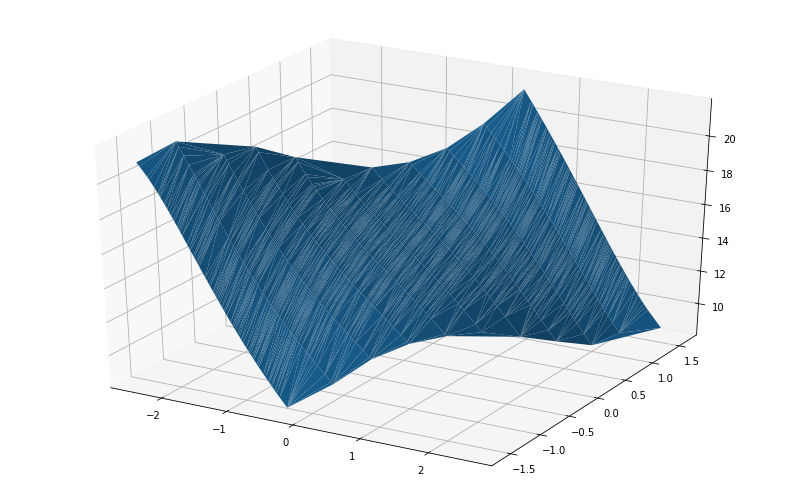

In [ ]:
plot_surface(X_train,w)

In [ ]:
w = SGD(X_train, Y_train, 5000, 1)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 171.48048203331936
50 114.67677133312483
100 97.151371940185
150 89.0706256030487
200 82.34875946364293
250 77.48015861139493
300 73.20207842089945
350 64.47055258925442
400 59.492946697567845
450 55.42255906711373
500 51.26511554280273
550 48.0036780483232
600 44.06342238433209
650 40.218700150866574
700 36.493067712448855
750 33.89985276241007
800 31.402041296388415
850 29.17492261175817
900 27.211735071081765
950 24.878309537700854
1000 22.83410832407872
1050 21.459595957330844
1100 19.894589084525077
1150 18.15699572983241
1200 16.741581175144
1250 15.641541341803137
1300 14.610877650326138
1350 13.610576616158733
1400 12.96712962420426
1450 12.10394617586028
1500 11.225850664737802
1550 10.51874428356198
1600 9.98632715592341
1650 9.429753097622163
1700 8.842523042631106
1750 8.315215961313802
1800 7.8210172915149565
1850 7.388380255484773
1900 7.2159931905906936
1950 6.886965477931758
2000 6.393523447791406
2050 6.139574663369546
2100 5.927796141153214
2150 5.687838650401557
22

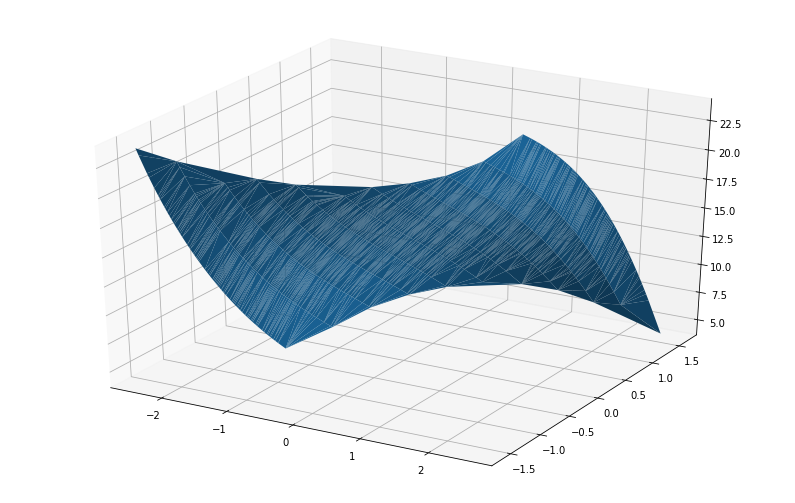

In [ ]:
plot_surface(X_train,w)

#7th degree

In [ ]:
X_test = np.hstack((
    X_test,
    (X_test[:, 1] ** 7).reshape((i, 1)),
    (X_test[:, 2] ** 7).reshape((i, 1)),
    (np.multiply((X_test[:,1]**6),X_test[:,2])).reshape((i,1)),
    (np.multiply(X_test[:,1],(X_test[:,2]**6))).reshape((i,1)),
    (np.multiply((X_test[:,1]**5),(X_test[:,2]**2))).reshape((i,1)),
    (np.multiply((X_test[:,1]**4),(X_test[:,2]**3))).reshape((i,1)),
    (np.multiply((X_test[:,1]**3),(X_test[:,2]**4))).reshape((i,1)),
    (np.multiply((X_test[:,1]**2),(X_test[:,2]**5))).reshape((i,1))
))

X_test[:, 1:] = (X_test[:, 1:] - np.mean(X_test[:, 1:], axis=0)) / np.std(X_test[:, 1:], axis=0)

In [ ]:
X_train = np.hstack((
    X_train,
    (X_train[:, 1] ** 7).reshape((m, 1)),
    (X_train[:, 2] ** 7).reshape((m, 1)),
    (np.multiply((X_train[:,1]**6),X_train[:,2])).reshape((m,1)),
    (np.multiply(X_train[:,1],(X_train[:,2]**6))).reshape((m,1)),
    (np.multiply((X_train[:,1]**5),(X_train[:,2]**2))).reshape((m,1)),
    (np.multiply((X_train[:,1]**4),(X_train[:,2]**3))).reshape((m,1)),
    (np.multiply((X_train[:,1]**3),(X_train[:,2]**4))).reshape((m,1)),
    (np.multiply((X_train[:,1]**2),(X_train[:,2]**5))).reshape((m,1))
))

X_train[:, 1:] = (X_train[:, 1:] - np.mean(X_train[:, 1:], axis=0)) / np.std(X_train[:, 1:], axis=0)

X_train.shape

(1155, 36)

In [ ]:
w = BGD(X_train, Y_train, 1000, 0.01)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 166.846602004698
50 44.619819770803424
100 18.39381567577505
150 8.603704564831068
200 4.860228739170311
250 3.3618783560578063
300 2.709637243515745
350 2.3854670745478423
400 2.1955313007962096
450 2.065845511067924
500 1.9670849568599325
550 1.8868156520200225
600 1.819174120609933
650 1.7609869538291487
700 1.7102796718639761
750 1.6656804708503459
800 1.6261649771287736
850 1.5909350990026203
900 1.5593535871162705
950 1.5309038456791382
W is [ 1.49309618e+01 -3.34939621e+00  2.73496421e+00  2.26953059e-01
 -3.42037831e-02 -3.48071615e-02 -8.80862788e-01  1.22737766e+00
 -3.86624666e-01 -6.45141748e-01  1.32698159e-01 -2.37411169e-01
 -2.75026601e-01  4.52472765e-01 -3.39075674e-01 -3.86015114e-01
  6.73845918e-01  2.69503103e-01 -4.41714964e-01  9.60603337e-02
 -5.19924535e-01  1.62251807e-02  1.40280716e-01  1.07066832e-01
 -2.47425782e-02  1.15714481e-01 -1.91458358e-01  1.98046389e-03
  3.63049550e-01  7.65811323e-02  3.68258483e-01  3.30126403e-01
  2.44563524e-01  2.153432

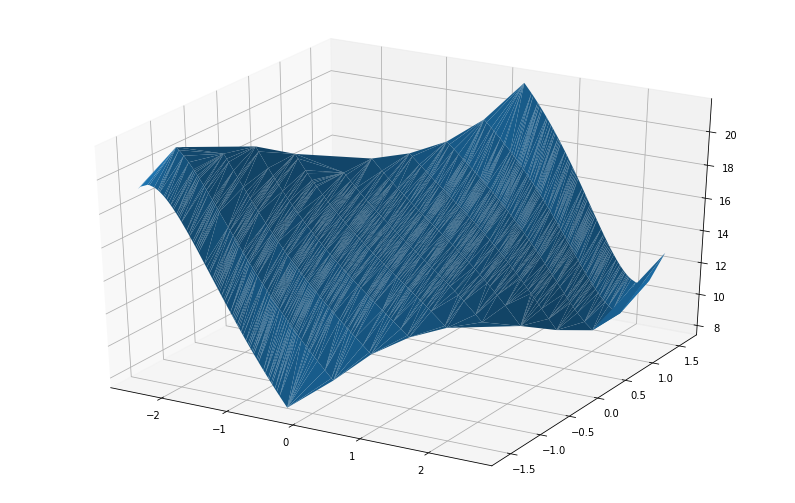

In [ ]:
plot_surface(X_train,w)

In [ ]:
w = SGD(X_train, Y_train, 6000, 1)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 184.31215885305954
50 136.50797443484043
100 93.59665430034299
150 81.63740201451711
200 74.03063084236382
250 68.69792052382392
300 62.51945664386014
350 57.52003518241189
400 52.62365920679211
450 48.60245213087707
500 44.91607992857752
550 42.156217226748964
600 38.90008916687251
650 35.88406353081851
700 32.5753601562592
750 30.2101713464704
800 27.56404193895806
850 25.52116668200131
900 23.664554464959902
950 21.690432093517156
1000 20.21480520593504
1050 18.842482306662284
1100 17.335920752638376
1150 16.901314104467684
1200 15.336888059704055
1250 14.203752432710251
1300 13.23095310049993
1350 12.361292934467436
1400 11.61531137846174
1450 10.896766228358752
1500 10.209592831229202
1550 9.752358274630854
1600 8.962157182844047
1650 8.557667464116033
1700 7.953587472904601
1750 7.573519165161376
1800 7.2575112113358395
1850 6.948214936051787
1900 6.546013371355585
1950 6.313138620745754
2000 6.084365858643643
2050 5.7257597886024145
2100 5.340343868870291
2150 5.09113615630239

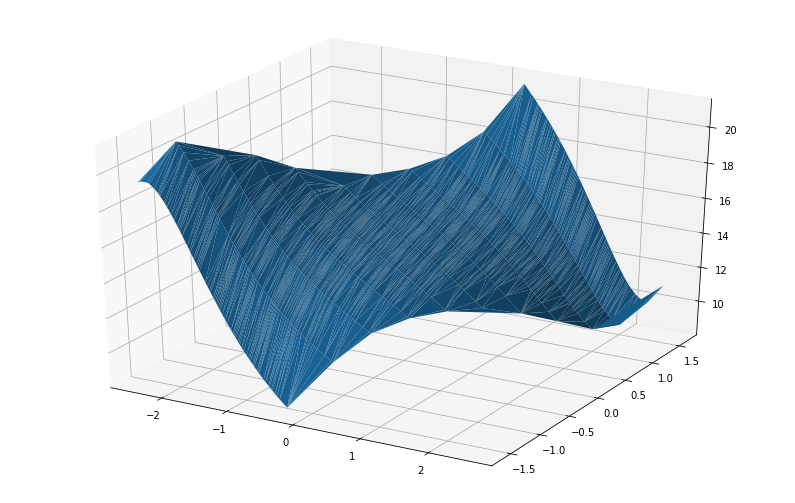

In [ ]:
plot_surface(X_train,w)

#8th degree

In [ ]:
X_test = np.hstack((
    X_test,
    (X_test[:, 1] ** 8).reshape((i, 1)),
    (X_test[:, 2] ** 8).reshape((i, 1)),
    (np.multiply((X_test[:,1]**7),X_test[:,2])).reshape((i,1)),
    (np.multiply(X_test[:,1],(X_test[:,2]**7))).reshape((i,1)),
    (np.multiply((X_test[:,1]**6),(X_test[:,2]**2))).reshape((i,1)),
    (np.multiply((X_test[:,1]**5),(X_test[:,2]**3))).reshape((i,1)),
    (np.multiply((X_test[:,1]**4),(X_test[:,2]**4))).reshape((i,1)),
    (np.multiply((X_test[:,1]**3),(X_test[:,2]**5))).reshape((i,1)),
    (np.multiply((X_test[:,1]**2),(X_test[:,2]**6))).reshape((i,1))
))

X_test[:, 1:] = (X_test[:, 1:] - np.mean(X_test[:, 1:], axis=0)) / np.std(X_test[:, 1:], axis=0)

In [ ]:
X_train = np.hstack((
    X_train,
    (X_train[:, 1] ** 8).reshape((m, 1)),
    (X_train[:, 2] ** 8).reshape((m, 1)),
    (np.multiply((X_train[:,1]**7),X_train[:,2])).reshape((m,1)),
    (np.multiply(X_train[:,1],(X_train[:,2]**7))).reshape((m,1)),
    (np.multiply((X_train[:,1]**6),(X_train[:,2]**2))).reshape((m,1)),
    (np.multiply((X_train[:,1]**5),(X_train[:,2]**3))).reshape((m,1)),
    (np.multiply((X_train[:,1]**4),(X_train[:,2]**4))).reshape((m,1)),
    (np.multiply((X_train[:,1]**3),(X_train[:,2]**5))).reshape((m,1)),
    (np.multiply((X_train[:,1]**2),(X_train[:,2]**6))).reshape((m,1))
))

X_train[:, 1:] = (X_train[:, 1:] - np.mean(X_train[:, 1:], axis=0)) / np.std(X_train[:, 1:], axis=0)

X_train.shape

(1155, 45)

In [ ]:
w = BGD(X_train, Y_train, 1000, 0.01)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 246.90335183105586
50 41.01419178792621
100 17.064356831320556
150 8.128555306433533
200 4.71466392101086
250 3.348863034643544
300 2.7530811887696207
350 2.454571330606911
400 2.276865579258007
450 2.1529226761118583
500 2.056391992259643
550 1.9762491694636533
600 1.9073857459465144
650 1.847083075668975
700 1.7936663421184518
750 1.7459727555547124
800 1.7031282779097383
850 1.6644444288771678
900 1.6293641111484376
950 1.5974290841291994
W is [ 1.49309897e+01 -3.07155035e+00  2.61150186e+00  1.34709657e-01
 -1.80082003e-01  9.01560084e-03 -1.18225625e+00  1.23898584e+00
 -5.78222398e-01 -2.29645393e-01  2.29808651e-01  2.08594383e-01
  1.33131994e-01 -2.01923385e-01 -3.36783881e-01 -8.26587701e-02
  3.48419617e-01 -8.51621022e-02 -1.03819301e-01 -6.06525813e-01
 -4.64373776e-01  2.67120276e-01  3.10143728e-01 -3.25516564e-02
 -7.01756220e-02  8.88134184e-02  1.05605076e-01 -3.99719743e-01
  6.93556261e-01  3.68621647e-01  1.95082726e-02 -2.72505183e-01
  5.71051418e-01  9.5286077

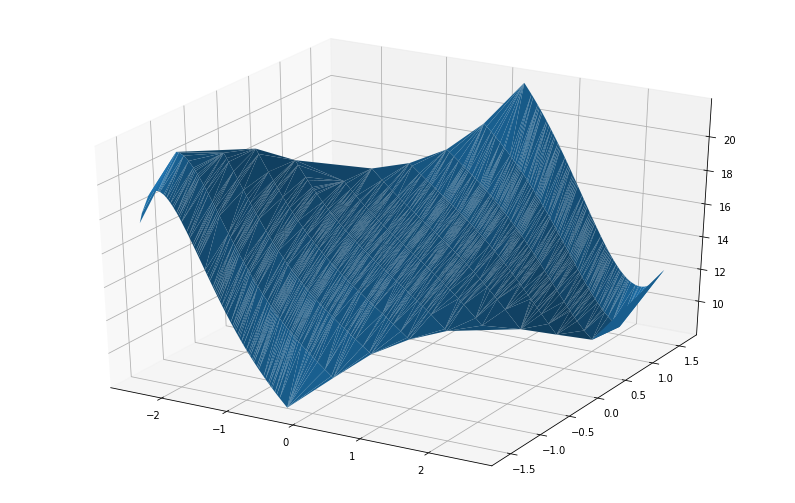

In [ ]:
plot_surface(X_train,w)

In [ ]:
w = SGD(X_train, Y_train, 6000, 1)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 235.85927584825745
50 142.83412622955996
100 105.00087467677272
150 84.15505543179862
200 78.62061976296052
250 70.39315639673607
300 67.04213357455414
350 62.08350621826586
400 54.706766258379616
450 53.164151602545346
500 49.21783938434143
550 43.24559209366163
600 41.57098186014342
650 38.659513763259184
700 39.822763076586654
750 32.23224236495369
800 30.262492978254834
850 27.453580098294985
900 26.13282842346958
950 24.208680994414127
1000 24.49390492933074
1050 20.099752586198814
1100 18.984466669809287
1150 17.471269155650727
1200 15.707774542806392
1250 14.772223935353582
1300 13.801461662733912
1350 13.10712561858495
1400 11.874540049746221
1450 11.203623151442367
1500 10.64849312107484
1550 10.106560806595084
1600 9.632859430844917
1650 8.731454352799933
1700 8.41185954095123
1750 7.83149709912676
1800 7.324838367680235
1850 6.9722906590002545
1900 6.519951670558031
1950 6.217414724854785
2000 6.03592273847409
2050 5.641569123104406
2100 5.409556230549828
2150 5.1034154942

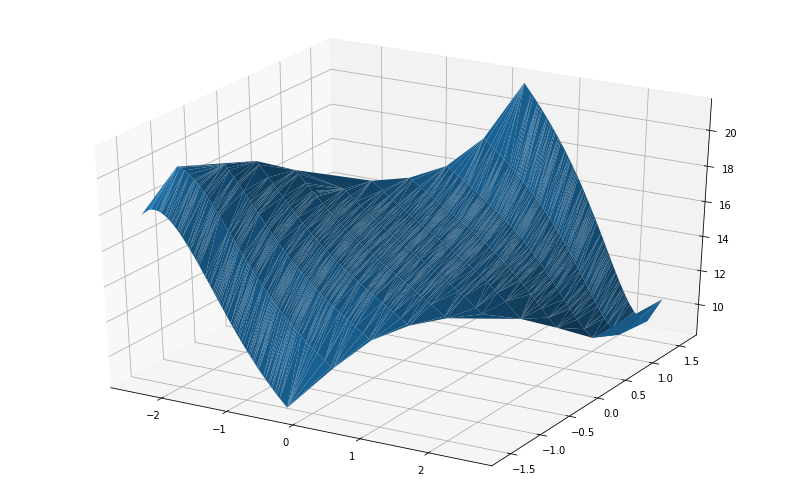

In [ ]:
plot_surface(X_train,w)

#9th degree

In [ ]:
X_test = np.hstack((
    X_test,
    (X_test[:, 1] ** 9).reshape((i, 1)),
    (X_test[:, 2] ** 9).reshape((i, 1)),
    (np.multiply((X_test[:,1]**8),X_test[:,2])).reshape((i,1)),
    (np.multiply(X_test[:,1],(X_test[:,2]**8))).reshape((i,1)),
    (np.multiply((X_test[:,1]**7),(X_test[:,2]**2))).reshape((i,1)),
    (np.multiply((X_test[:,1]**6),(X_test[:,2]**3))).reshape((i,1)),
    (np.multiply((X_test[:,1]**5),(X_test[:,2]**4))).reshape((i,1)),
    (np.multiply((X_test[:,1]**4),(X_test[:,2]**5))).reshape((i,1)),
    (np.multiply((X_test[:,1]**3),(X_test[:,2]**6))).reshape((i,1)),
    (np.multiply((X_test[:,1]**2),(X_test[:,2]**7))).reshape((i,1))
))

X_test[:, 1:] = (X_test[:, 1:] - np.mean(X_test[:, 1:], axis=0)) / np.std(X_test[:, 1:], axis=0)


In [ ]:
X_train = np.hstack((
    X_train,
    (X_train[:, 1] ** 9).reshape((m, 1)),
    (X_train[:, 2] ** 9).reshape((m, 1)),
    (np.multiply((X_train[:,1]**8),X_train[:,2])).reshape((m,1)),
    (np.multiply(X_train[:,1],(X_train[:,2]**8))).reshape((m,1)),
    (np.multiply((X_train[:,1]**7),(X_train[:,2]**2))).reshape((m,1)),
    (np.multiply((X_train[:,1]**6),(X_train[:,2]**3))).reshape((m,1)),
    (np.multiply((X_train[:,1]**5),(X_train[:,2]**4))).reshape((m,1)),
    (np.multiply((X_train[:,1]**4),(X_train[:,2]**5))).reshape((m,1)),
    (np.multiply((X_train[:,1]**3),(X_train[:,2]**6))).reshape((m,1)),
    (np.multiply((X_train[:,1]**2),(X_train[:,2]**7))).reshape((m,1))
))

X_train[:, 1:] = (X_train[:, 1:] - np.mean(X_train[:, 1:], axis=0)) / np.std(X_train[:, 1:], axis=0)

X_train.shape

(1155, 55)

In [ ]:
w = BGD(X_train, Y_train, 1000, 0.01)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 264.9866423737993
50 39.66055257017826
100 16.236324607983175
150 7.55263885372498
200 4.282100690616681
250 3.007341418810801
300 2.4740692223661584
350 2.220804902506029
400 2.076967934779528
450 1.9789132342807931
500 1.9024421850018998
550 1.8380031498676022
600 1.7815517314569063
650 1.731164195548296
700 1.6857702215570978
750 1.6446701226833083
800 1.6073449382777192
850 1.5733775401378485
900 1.5424169441676132
950 1.5141601935562292
W is [ 1.49309931e+01 -3.36631201e+00  2.74951999e+00 -3.04417520e-02
 -3.84442807e-02  1.30151704e-01 -1.11161228e+00  1.18160654e+00
 -5.25308232e-01 -1.67867551e-01 -1.60070415e-01 -3.00722878e-01
  3.37463959e-02 -1.16899521e-01  2.57325248e-01 -2.71333607e-02
  5.38202439e-01  4.48791793e-02 -2.56722750e-02 -3.45544699e-01
 -2.81515826e-01 -3.22340059e-01  6.07453735e-02  9.14584517e-02
  4.40303539e-01  4.51229871e-01  1.05480553e-01 -2.64692644e-01
  4.85132998e-03  3.88355296e-01  5.00871446e-01  2.99126247e-01
  3.54599644e-01 -3.6526099

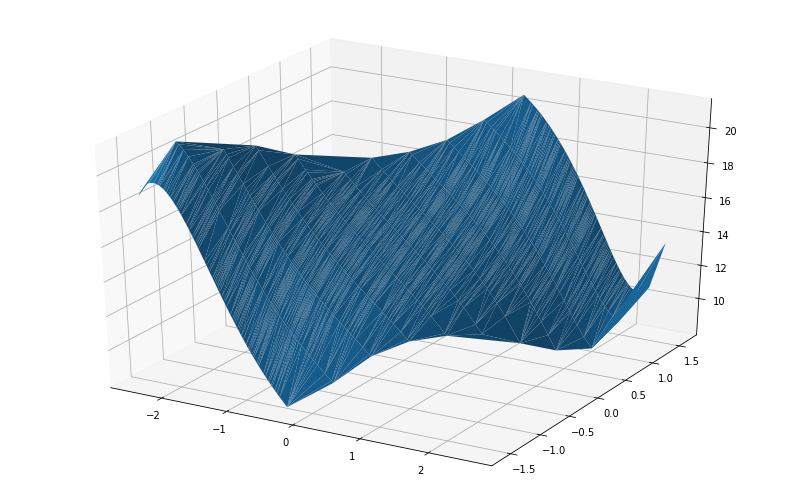

In [ ]:
plot_surface(X_train,w)

In [ ]:
w = SGD(X_train, Y_train, 10000, 1)
print("W is" , w)

test_Error = np.mean(np.square(X_test @ w.T - Y_test))
print("Test error is ", test_Error)

0 271.0066315295311
50 126.33910459864464
100 93.23817710296501
150 82.91184185208253
200 75.742130623606
250 69.51241270727365
300 63.18812813574257
350 59.07563497002924
400 58.21606370462503
450 59.63009631489251
500 46.28662615525437
550 42.18718111231032
600 39.70138636047399
650 37.04999109290232
700 35.36042421165534
750 30.318740810332223
800 28.211098672650092
850 27.521557614563942
900 24.13445030770808
950 22.383976760122696
1000 20.831194703934045
1050 18.941582358381922
1100 17.631743943364004
1150 16.3519869623662
1200 14.983990577341423
1250 13.96409614401454
1300 13.087638787133427
1350 12.509252331852144
1400 12.474089309645983
1450 10.86382660341796
1500 10.065154281293648
1550 9.486176218070343
1600 9.120310661201925
1650 8.670445354073316
1700 7.918222455400334
1750 7.4541355062415295
1800 7.220762649193564
1850 6.953882215073785
1900 6.589481406556808
1950 6.359663738945654
2000 5.959294664708041
2050 5.922563642474465
2100 5.678784322972491
2150 5.345881795192679


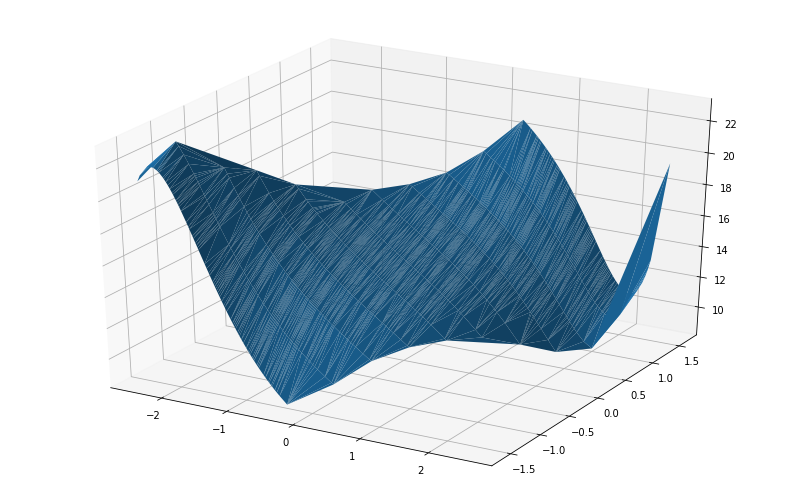

In [ ]:
plot_surface(X_train,w)

#Ridge regression


In [ ]:
def BGD_ridge(X,Y,epoch,alpha,lambd):

  m,n = X.shape
  w = np.random.random(n)

  for iter in range(epoch):
    Y_pred = X @ w.T
    J = (1/(2*m))*(np.sum(np.square(Y_pred - Y)) + lambd*np.sum(w**2))
    w = (1-alpha*lambd/m) * w - alpha * (1/m) * (X.T @ (Y_pred - Y))


  return(w)

In [ ]:
def SGD_ridge(X,Y,epoch,alpha,lambd):

  m,n = X.shape
  w = np.random.random(n)

  for iter in range(epoch):
    ind = randint(0,m-1)

    Y_pred_ind = X[ind] @ w.T
  
    w = (1-alpha*lambd/m)* w - alpha * (1/m) * X[ind]* (Y_pred_ind - Y[ind])

  return(w)

In [ ]:
lambd_vals = np.linspace(0.001,100,20)

RMS_error = []

m,n = X_train.shape
i,j = X_test.shape

for lambd in lambd_vals:
  print("Lambda is", lambd)
  w = BGD_ridge(X_train, Y_train, 2000, 0.01, lambd)

  RMS = math.sqrt((np.sum(np.square(X_train @ w.T - Y_train)))/m)

  RMS_error.append(RMS)

  train_error = (1/(2*m))*(np.sum(np.square(X_train @ w.T - Y_train)) + lambd*np.sum(w**2))
  print("Training error is ", train_error) 

  test_Error = (1/(2*i))*(np.sum(np.square(X_test @ w.T - Y_test)) + lambd*np.sum(w**2))
  print("Test error is ", test_Error)

  print("--------------------------------------------------------------------")

Lambda is 0.001
Training error is  1.2804381157589906
Test error is  1.376765183438146
--------------------------------------------------------------------
Lambda is 5.264105263157894
Training error is  1.86187171457241
Test error is  2.7630410348408323
--------------------------------------------------------------------
Lambda is 10.527210526315788
Training error is  2.4619043530986744
Test error is  4.133191165835529
--------------------------------------------------------------------
Lambda is 15.790315789473683
Training error is  3.0505488026707774
Test error is  5.473073758917626
--------------------------------------------------------------------
Lambda is 21.053421052631577
Training error is  3.616040111116364
Test error is  6.750841877389712
--------------------------------------------------------------------
Lambda is 26.31652631578947
Training error is  4.173594461348854
Test error is  8.026086342070567
--------------------------------------------------------------------
Lamb

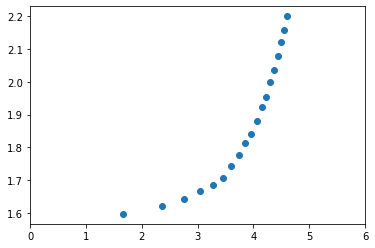

In [ ]:
plt.scatter(np.log(lambd_vals), RMS_error)
plt.xlim([0,6])
plt.show()

In [ ]:
lambd_vals = np.linspace(0.001,0.5,20)
RMS_error = []

for lambd in lambd_vals:
  print("Lambda is", lambd)
  w = SGD_ridge(X_train, Y_train, 10000, 2, lambd)

  RMS = math.sqrt((np.sum(np.square(X_train @ w.T - Y_train)))/m)

  RMS_error.append(RMS)

  train_error = (1/(2*m))*(np.sum(np.square(X_train @ w.T - Y_train)) + lambd*np.sum(w**2))
  print("Training error is ", train_error) 

  test_Error = (1/(2*i))*(np.sum(np.square(X_test @ w.T - Y_test)) + lambd*np.sum(w**2))
  print("Test error is ", test_Error)

  print("--------------------------------------------------------------------")

Lambda is 0.001
Training error is  1.3680384485556283
Test error is  1.4510269154762965
--------------------------------------------------------------------
Lambda is 0.027263157894736843
Training error is  1.5616070133554318
Test error is  1.8659320427805215
--------------------------------------------------------------------
Lambda is 0.053526315789473686
Training error is  3.0658639417338827
Test error is  3.8820687482974554
--------------------------------------------------------------------
Lambda is 0.07978947368421052
Training error is  2.2648145743790575
Test error is  2.70476130329858
--------------------------------------------------------------------
Lambda is 0.10605263157894737
Training error is  3.008124039053294
Test error is  3.6154782108992327
--------------------------------------------------------------------
Lambda is 0.13231578947368422
Training error is  3.4707992598403115
Test error is  3.9823519980518642
----------------------------------------------------------

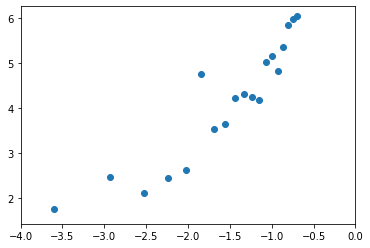

In [ ]:
plt.scatter(np.log(lambd_vals), RMS_error)
plt.xlim([-4,0])
plt.show()

#Lasso Regression

In [ ]:
def BGD_lasso(X,Y,epoch,alpha,lambd):

  m,n = X.shape
  w = np.random.random(n)

  for iter in range(epoch):
    Y_pred = X @ w.T
    J = (1/(2*m))*(np.sum(np.square(Y_pred - Y)) + lambd*np.sum(np.abs(w)))
    w =  w - alpha * (1/m) * (X.T @ (Y_pred - Y)) - (alpha*lambd/(2*m)) * np.sign(w)
    
  return(w)

In [ ]:
def SGD_lasso(X,Y,epoch,alpha,lambd):

  m,n = X.shape
  w = np.random.random(n)

  for iter in range(epoch):
    ind = randint(0,m-1)

    Y_pred_ind = X[ind] @ w.T
  
    w =  w - alpha * (1/m) * (X[ind] * (Y_pred_ind - Y[ind])) - (alpha*lambd/(2*m)) * np.sign(w)

  return(w)

In [ ]:
lambd_vals = np.linspace(0.001,100,20)
RMS_error = []

m,n = X_train.shape
i,j = X_test.shape

for lambd in lambd_vals:
  print("Lambda is", lambd)
  w = BGD_lasso(X_train, Y_train, 2000, 0.01, lambd)

  RMS = math.sqrt((np.sum(np.square(X_train @ w.T - Y_train)))/m)

  RMS_error.append(RMS)

  train_error = (1/(2*m))*(np.sum(np.square(X_train @ w.T - Y_train)) + lambd*np.sum(w**2))
  print("Training error is ", train_error) 

  test_Error = (1/(2*i))*(np.sum(np.square(X_test @ w.T - Y_test)) + lambd*np.sum(w**2))
  print("Test error is ", test_Error)

  print("--------------------------------------------------------------------")

Lambda is 0.001
Training error is  1.274807260626282
Test error is  1.3910746449594646
--------------------------------------------------------------------
Lambda is 5.264105263157894
Training error is  1.8638479908854682
Test error is  2.743488641455672
--------------------------------------------------------------------
Lambda is 10.527210526315788
Training error is  2.4350423423654575
Test error is  4.103357458762565
--------------------------------------------------------------------
Lambda is 15.790315789473683
Training error is  3.032828101408185
Test error is  5.4796646019267605
--------------------------------------------------------------------
Lambda is 21.053421052631577
Training error is  3.62409540903727
Test error is  6.849991685410231
--------------------------------------------------------------------
Lambda is 26.31652631578947
Training error is  4.203947587302582
Test error is  8.220073798378204
--------------------------------------------------------------------
Lamb

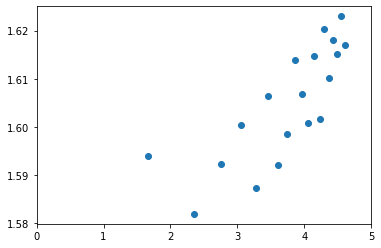

In [ ]:
plt.scatter(np.log(lambd_vals), RMS_error)
plt.xlim([0,5])
plt.show()

In [ ]:
lambd_vals = np.linspace(0.001,0.5,20)
RMS_error = []

for lambd in lambd_vals:
  print("Lambda is", lambd)
  w = SGD_lasso(X_train, Y_train, 10000, 2, lambd)

  RMS = math.sqrt((np.sum(np.square(X_train @ w.T - Y_train)))/m)

  RMS_error.append(RMS)

  train_error = (1/(2*m))*(np.sum(np.square(X_train @ w.T - Y_train)) + lambd*np.sum(w**2))
  print("Training error is ", train_error) 

  test_Error = (1/(2*i))*(np.sum(np.square(X_test @ w.T - Y_test)) + lambd*np.sum(w**2))
  print("Test error is ", test_Error)

  print("--------------------------------------------------------------------")

Lambda is 0.001
Training error is  1.3842295357700807
Test error is  1.3863531324339207
--------------------------------------------------------------------
Lambda is 0.027263157894736843
Training error is  1.3745773023423895
Test error is  1.3734044710340336
--------------------------------------------------------------------
Lambda is 0.053526315789473686
Training error is  1.3615613760455083
Test error is  1.454366538626524
--------------------------------------------------------------------
Lambda is 0.07978947368421052
Training error is  1.3961211076716027
Test error is  1.4473609930906006
--------------------------------------------------------------------
Lambda is 0.10605263157894737
Training error is  1.3975328173409909
Test error is  1.5194213096188194
--------------------------------------------------------------------
Lambda is 0.13231578947368422
Training error is  1.4963861442436543
Test error is  1.5251176287493347
--------------------------------------------------------

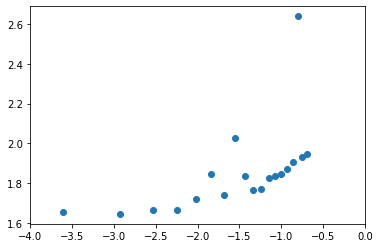

In [ ]:
plt.scatter(np.log(lambd_vals), RMS_error)
plt.xlim([-4,0])
plt.show()